In [1]:
from agent import Agent
from helper import plot

pygame 2.1.2 (SDL 2.0.18, Python 3.7.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


<Figure size 432x288 with 0 Axes>

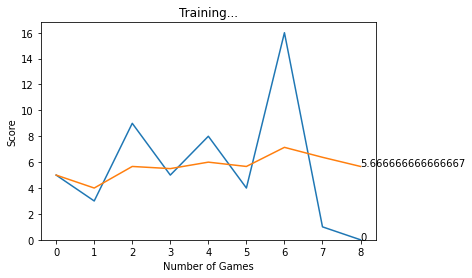

NameError: name 'quit' is not defined

In [2]:
plot_scores = []
plot_mean_scores = []
total_score = 0
record = 0
epsilons = []
agent = Agent()
i_episode = 0
agent.load_model('model_v2.pth')

while True:
    i_episode += 1
    state = agent.get_observation()
    action = agent.e_greedy_action(state)
    reward, done, score = agent.game.play_step(action)
    new_state = agent.get_observation()
    # train short memory
    agent.train_step(state, action, reward, new_state, done)

    # remember
    agent.remember(state, action, reward, new_state, done)
    
    agent.update_policy()
    
    if done:
        # train long memory, plot result
        agent.game.reset()
        agent.n_games += 1
        
        states, actions, rewards, new_states, dones = agent.get_memory_sample()
        agent.train_step(states, actions, rewards, new_states, dones)

        if score > record:
            record = score
            agent.save_model('model_v2.pth')

        print('Game', agent.n_games, 'Score', score, 'Record:', record)

        plot_scores.append(score)
        total_score += score
        mean_score = total_score / agent.n_games
        plot_mean_scores.append(mean_score)
        
        if i_episode % 20 == 0:
            agent.update_target_network()
            
        plot(plot_scores,plot_mean_scores)